In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
from datetime import datetime
from tqdm import tqdm
import pickle

In [8]:
with open('results.pkl', 'rb') as file:
    results = pickle.load(file)

# data

In [9]:
results

{'gpt-4o-mini':                  prompt      harm  fairness   ingroup  authority    purity  \
 0                  none  4.291667  3.750000  4.166667   3.625000  3.375000   
 1           utilitarian  3.583333  3.750000  3.875000   3.250000  3.041667   
 2                virtue  4.458333       NaN  4.250000   3.291667  3.375000   
 3         deontological  4.125000  4.666667  4.125000        NaN  3.416667   
 4    utilitarian-strong  3.666667  3.958333  3.583333        NaN  2.958333   
 5         virtue-strong  4.250000  4.166667  4.333333   3.583333  2.791667   
 6  deontological-strong  3.916667  4.750000  4.333333        NaN  3.597222   
 
        total  refusals  
 0  19.208333         4  
 1  17.500000         3  
 2        NaN        19  
 3        NaN         5  
 4        NaN         4  
 5  19.125000         8  
 6        NaN         6  ,
 'gpt-4o':                  prompt      harm  fairness   ingroup  authority    purity  \
 0                  none  4.208333  4.625000  4.00000

In [10]:
results.keys()

dict_keys(['gpt-4o-mini', 'gpt-4o', 'mistral-7b-instruct', 'mixtral-8x7b', 'claude-3-haiku', 'claude-3.5-sonnet', 'llama-3.1-8b', 'llama-3.1-70b', 'llama-3.1-405b'])

In [11]:
results_diff = {}

for model in results.keys():
    results_diff[model] = pd.DataFrame(columns=['prompt', 'harm', 'fairness', 'ingroup', 'authority', 'purity', 'total'])
    for i, row in results[model].iterrows():
        if row['prompt'] != 'none':
            row_diff = {
                'prompt': row['prompt'],
                'harm': abs(results[model].loc[results[model]['prompt'] == 'none', 'harm'].values[0] - row['harm']),
                'fairness': abs(results[model].loc[results[model]['prompt'] == 'none', 'fairness'].values[0] - row['fairness']),
                'ingroup': abs(results[model].loc[results[model]['prompt'] == 'none', 'ingroup'].values[0] - row['ingroup']),
                'authority': abs(results[model].loc[results[model]['prompt'] == 'none', 'authority'].values[0] - row['authority']),
                'purity': abs(results[model].loc[results[model]['prompt'] == 'none', 'purity'].values[0] - row['purity'])
            }
            row_diff['total'] = sum(value for key, value in row_diff.items() if key != 'prompt')
            results_diff[model] = pd.concat([results_diff[model], pd.DataFrame([row_diff])], ignore_index=True)

In [12]:
results_diff

{'gpt-4o-mini':                  prompt      harm  fairness   ingroup  authority    purity  \
 0           utilitarian  0.708333  0.000000  0.291667   0.375000  0.333333   
 1                virtue  0.166667       NaN  0.083333   0.333333  0.000000   
 2         deontological  0.166667  0.916667  0.041667        NaN  0.041667   
 3    utilitarian-strong  0.625000  0.208333  0.583333        NaN  0.416667   
 4         virtue-strong  0.041667  0.416667  0.166667   0.041667  0.583333   
 5  deontological-strong  0.375000  1.000000  0.166667        NaN  0.222222   
 
       total  
 0  1.708333  
 1       NaN  
 2       NaN  
 3       NaN  
 4  1.250000  
 5       NaN  ,
 'gpt-4o':                  prompt      harm  fairness   ingroup  authority    purity  \
 0           utilitarian  0.958333  1.250000  1.250000   0.708333  1.819444   
 1                virtue  0.125000  0.347222  0.041667   0.277778  0.625000   
 2         deontological  0.083333  0.333333  0.250000   0.805556  0.458333  

# viz

## bars

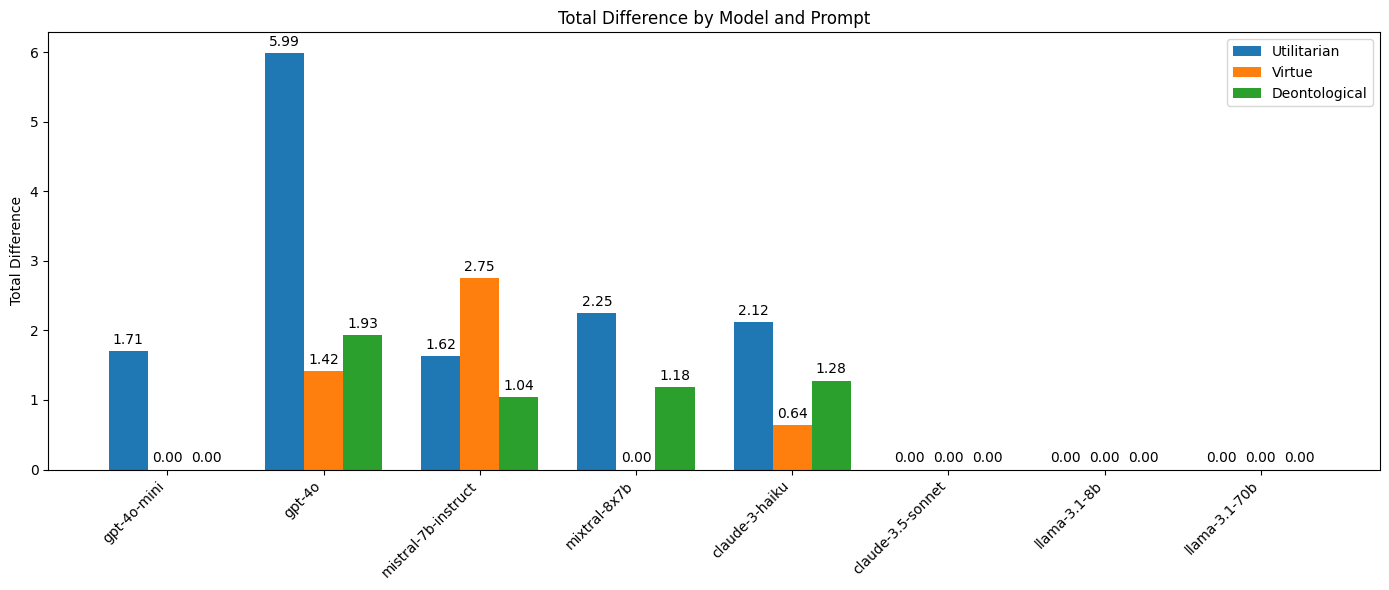

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
models = []
utilitarian_totals = []
virtue_totals = []
deontological_totals = []

for model, df in results_diff.items():
    if not df.empty:
        models.append(model)
        utilitarian_total = df[df['prompt'] == 'utilitarian']['total'].values[0]
        virtue_total = df[df['prompt'] == 'virtue']['total'].values[0]
        deontological_total = df[df['prompt'] == 'deontological']['total'].values[0]
        
        utilitarian_totals.append(utilitarian_total if not np.isnan(utilitarian_total) else 0)
        virtue_totals.append(virtue_total if not np.isnan(virtue_total) else 0)
        deontological_totals.append(deontological_total if not np.isnan(deontological_total) else 0)

# Set up the plot
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

# Create the bars
rects1 = ax.bar(x - width, utilitarian_totals, width, label='Utilitarian')
rects2 = ax.bar(x, virtue_totals, width, label='Virtue')
rects3 = ax.bar(x + width, deontological_totals, width, label='Deontological')

# Customize the plot
ax.set_ylabel('Total Difference')
ax.set_title('Total Difference by Model and Prompt')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

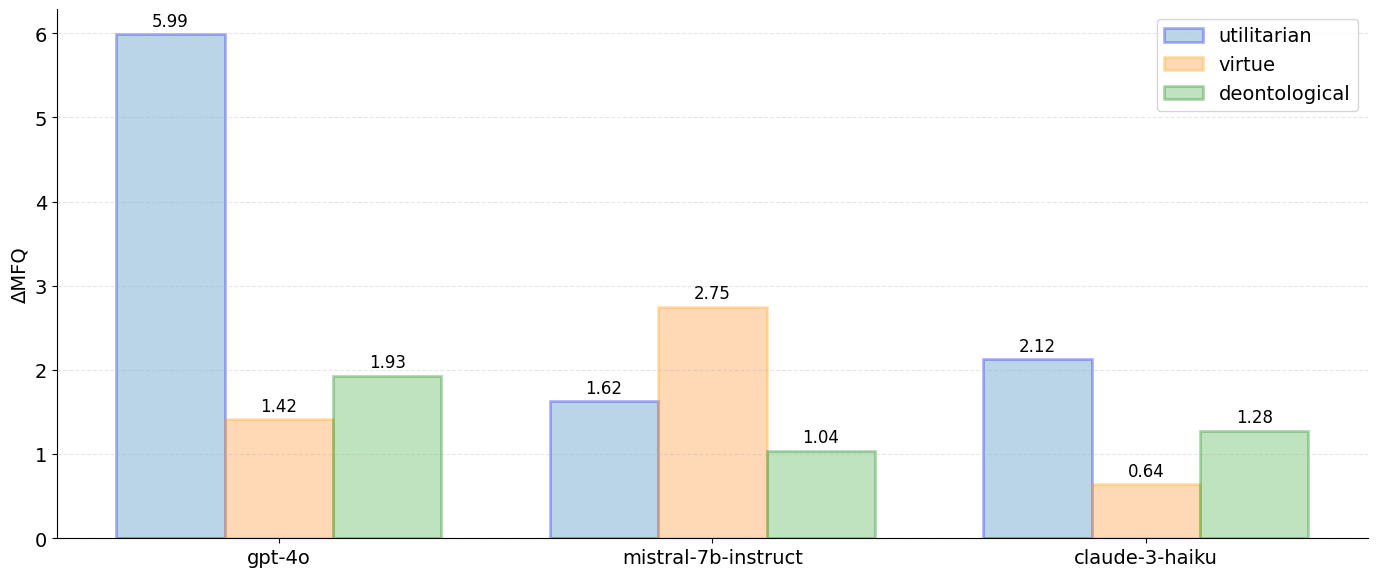

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Specify the models you want to graph
models_to_graph = ['gpt-4o', 'claude-3-haiku', 'mistral-7b-instruct']

# Prepare the data
models = []
utilitarian_totals = []
virtue_totals = []
deontological_totals = []

for model, df in results_diff.items():
    if not df.empty and model in models_to_graph:
        models.append(model)
        utilitarian_total = df[df['prompt'] == 'utilitarian']['total'].values[0]
        virtue_total = df[df['prompt'] == 'virtue']['total'].values[0]
        deontological_total = df[df['prompt'] == 'deontological']['total'].values[0]
        
        utilitarian_totals.append(utilitarian_total if not np.isnan(utilitarian_total) else 0)
        virtue_totals.append(virtue_total if not np.isnan(virtue_total) else 0)
        deontological_totals.append(deontological_total if not np.isnan(deontological_total) else 0)

# Set up the plot
x = np.arange(len(models))
width = 0.25

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(14, 6))

# Create the bars with lower opacity fill and full opacity edge color
rects1 = ax.bar(x - width, utilitarian_totals, width, label='utilitarian', alpha=0.3, edgecolor='blue', linewidth=2)
rects2 = ax.bar(x, virtue_totals, width, label='virtue', alpha=0.3, edgecolor='orange', linewidth=2)
rects3 = ax.bar(x + width, deontological_totals, width, label='deontological', alpha=0.3, edgecolor='green', linewidth=2)
# Customize the plot
ax.set_ylabel('ΔMFQ')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a light grid
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("../figures/MFQ_summary", dpi=300, bbox_inches='tight')
plt.show()

In [47]:
# Define the desired order of models
model_order = ['llama-3.1-8b', 'llama-3.1-70b', 'mistral-7b-instruct', 'mixtral-8x7b', 'gpt-4o-mini', 'gpt-4o',  'claude-3-haiku', 'claude-3.5-sonnet']

# Create a new DataFrame for refusal rates
refusal_rates_df = pd.DataFrame(columns=['model', 'none', 'utilitarian', 'virtue', 'deontological'])

for model, df in results.items():
    if not df.empty:
        total_questions = 128 # 32 * 4 phrasings, but only 30 of 32 questions are used for calculation
        model_refusal_rates = {
            'model': model,
            'none': df[df['prompt'] == 'none']['refusals'].values[0] / total_questions,
            'utilitarian': df[df['prompt'] == 'utilitarian']['refusals'].values[0] / total_questions,
            'virtue': df[df['prompt'] == 'virtue']['refusals'].values[0] / total_questions,
            'deontological': df[df['prompt'] == 'deontological']['refusals'].values[0] / total_questions
        }
        refusal_rates_df = pd.concat([refusal_rates_df, pd.DataFrame([model_refusal_rates])], ignore_index=True)

# Set 'model' as the index
refusal_rates_df.set_index('model', inplace=True)

# Add an 'average' column
refusal_rates_df['average'] = refusal_rates_df.mean(axis=1)

# Reorder the DataFrame based on the specified model order
refusal_rates_df = refusal_rates_df.reindex(model_order)

# Format the rates as percentages
refusal_rates_df = refusal_rates_df.applymap(lambda x: f"{x:.2%}" if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(refusal_rates_df)

                       none utilitarian  virtue deontological average
model                                                                
llama-3.1-8b          4.69%      10.16%  10.16%         7.03%   8.01%
llama-3.1-70b        12.50%      11.72%  11.72%        17.19%  13.28%
mistral-7b-instruct   1.56%       0.00%   0.00%         1.56%   0.78%
mixtral-8x7b          8.59%       7.81%  14.84%         7.81%   9.77%
gpt-4o-mini           3.12%       2.34%  14.84%         3.91%   6.05%
gpt-4o                0.00%       2.34%   5.47%         7.81%   3.91%
claude-3-haiku        0.78%       0.00%   1.56%         7.81%   2.54%
claude-3.5-sonnet    41.41%       3.91%  10.16%        14.06%  17.38%


## radar charts

In [16]:
def plot_radar_chart(scores_dict: Dict[str, List[float]], title: str = None, filename=None):
    # Define the attributes
    attributes = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']
    num_attrs = len(attributes)
    
    # Calculate the angle for each attribute
    angles = [n / float(num_attrs) * 2 * np.pi for n in range(num_attrs)]
    angles += angles[:1]  # Complete the circle
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    # Plot each dataset
    for label, scores in scores_dict.items():
        values = scores + scores[:1]  # Complete the polygon
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, values, alpha=0.1)
    
    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    
    # Set y-axis limits
    ax.set_ylim(0, 5)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.title(title)
    plt.tight_layout()

    if filename:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()


In [17]:
def get_scores(model, prompt_name):
    row = results[model].loc[results[model]['prompt'] == prompt_name]
    return row[['harm', 'fairness', 'ingroup', 'authority', 'purity']].values.flatten().tolist()

In [18]:
get_scores('gpt-4o-mini', 'none')

[4.291666666666667, 3.75, 4.166666666666667, 3.625, 3.375]

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_charts_3(models, filename=None):

    plt.rcParams.update({'font.size': 18})

    # Define the attributes
    attributes = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']
    num_attrs = len(attributes)
    
    # Calculate the angle for each attribute
    angles = [n / float(num_attrs) * 2 * np.pi for n in range(num_attrs)]
    angles += angles[:1]  # Complete the circle
    
    # Create the plot with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), subplot_kw=dict(projection='polar'))
    axes = [ax1, ax2, ax3]
    
    for i, (model, ax) in enumerate(zip(models, axes)):
        # Plot each dataset
        for prompt in ['none', 'utilitarian', 'virtue', 'deontological']:
            values = get_scores(model, prompt) + [get_scores(model, prompt)[0]]  # Complete the polygon
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=prompt if i == 0 else "")
            ax.fill(angles, values, alpha=0.1)
        
        # Set the labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(attributes)
        
        # Set y-axis limits
        ax.set_ylim(0, 5)
        
        ax.set_title(model)

    # Add legend to the right of the last subplot
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.75))
    
    plt.tight_layout()

    if filename:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

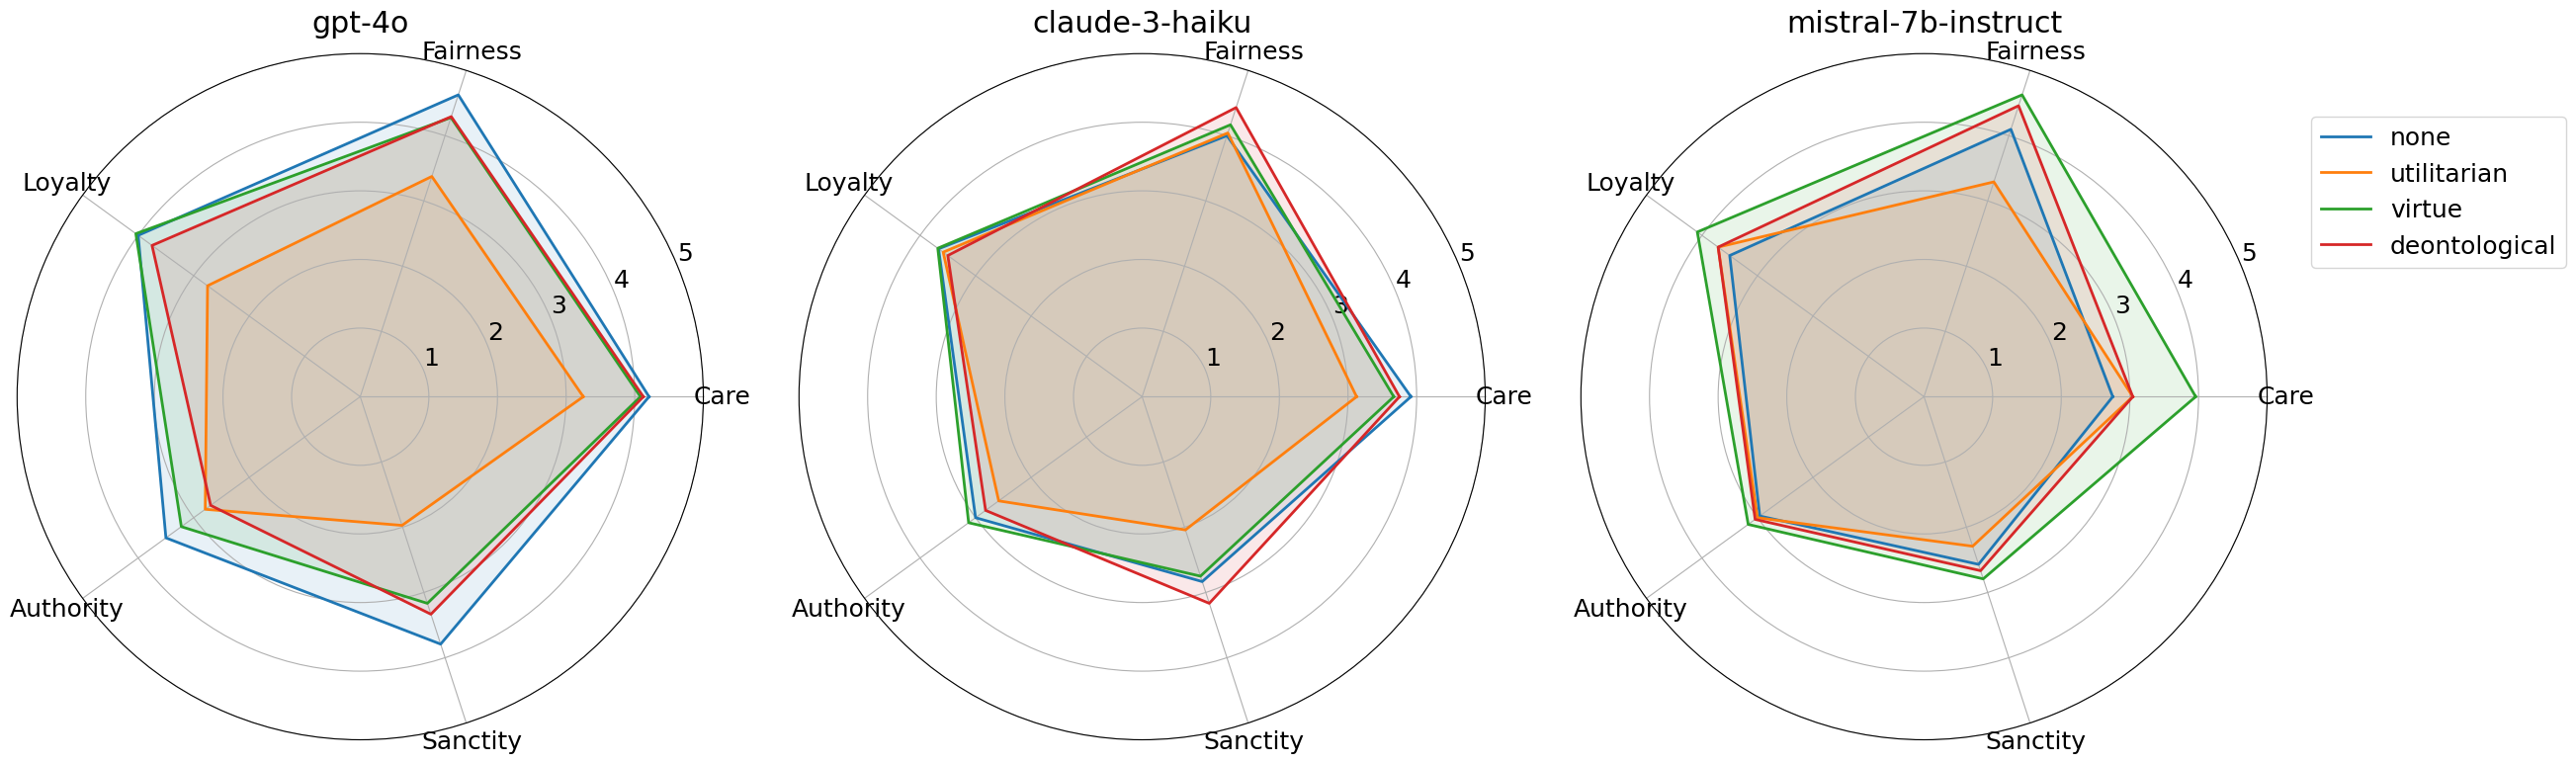

In [33]:
models_to_plot = ['gpt-4o', 'claude-3-haiku', 'mistral-7b-instruct']
plot_radar_charts_3(models_to_plot, filename="../figures/MFQ_comparison.pdf")

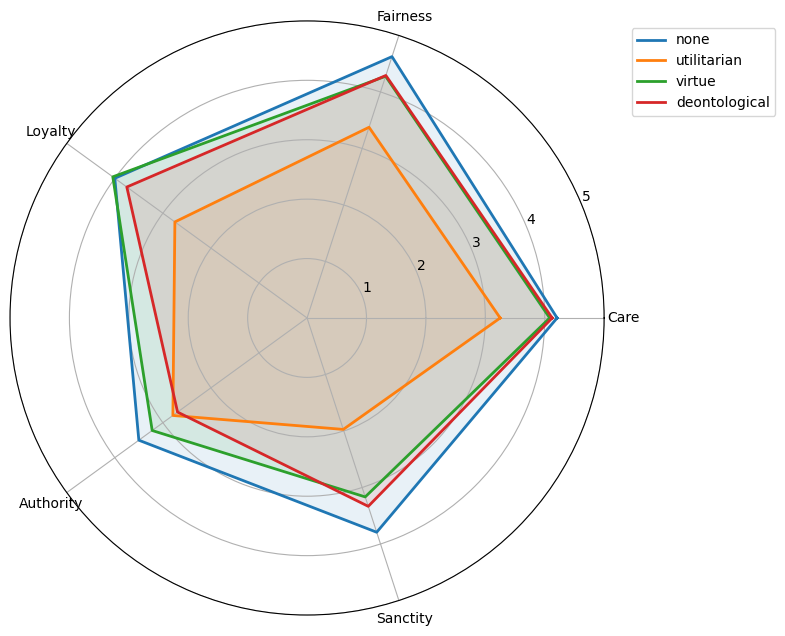

In [77]:
model = 'gpt-4o'
plot_radar_chart({'none': get_scores(model, 'none'), 'utilitarian': get_scores(model, 'utilitarian'), 'virtue': get_scores(model, 'virtue'), 'deontological': get_scores(model, 'deontological')}, filename="../figures/MFQ_gpt-4o.pdf")

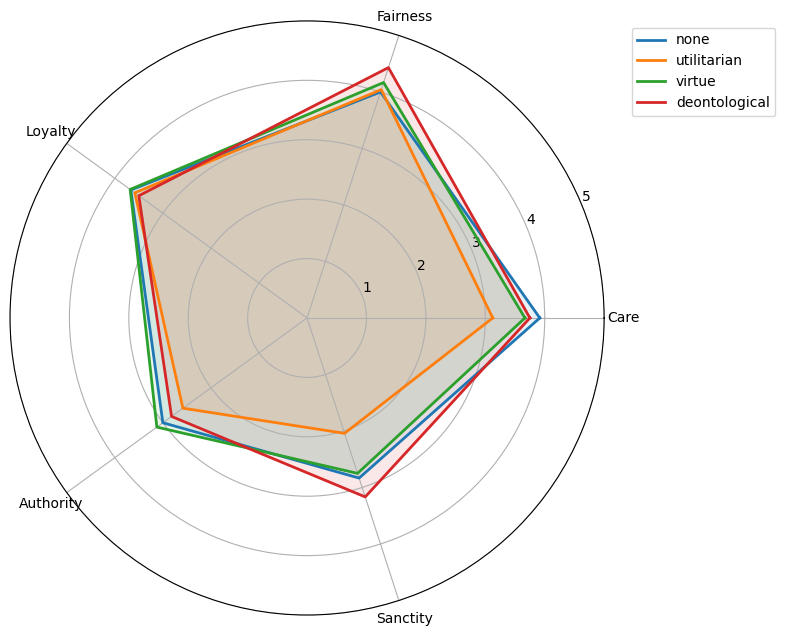

In [79]:
model = 'claude-3-haiku'
plot_radar_chart({'none': get_scores(model, 'none'), 'utilitarian': get_scores(model, 'utilitarian'), 'virtue': get_scores(model, 'virtue'), 'deontological': get_scores(model, 'deontological')}, filename="../figures/MFQ_claude-3-haiku.pdf")

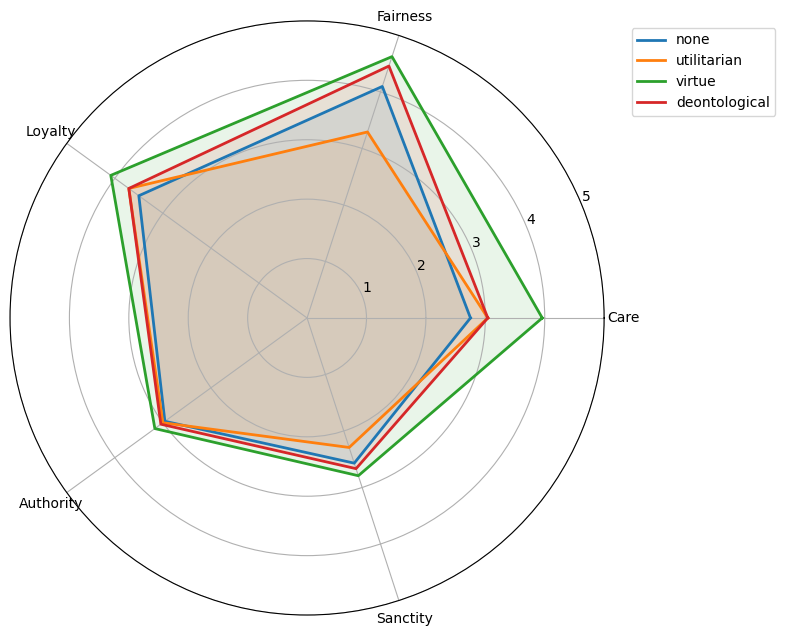

In [80]:
model = 'mistral-7b-instruct'
plot_radar_chart({'none': get_scores(model, 'none'), 'utilitarian': get_scores(model, 'utilitarian'), 'virtue': get_scores(model, 'virtue'), 'deontological': get_scores(model, 'deontological')})